# Titanic Project:

For this projet, I will analyse some of the data from the titanic passenger.

## Looking at the data:

I first found some informations about the data (source [kaagle](https://www.kaggle.com/c/titanic/data))
These informations help to understand how each variable is created and what values it should take.

> ### Variable descriptions:
>
>- survival:        Survival  (0 = No; 1 = Yes)
>- pclass:          Passenger Class  (1 = 1st; 2 = 2nd; 3 = 3rd)
>- name:            Name
>- sex:             Sex
>- age:             Age
>- sibsp:           Number of Siblings/Spouses Aboard
>- parch:           Number of Parents/Children Aboard
>- ticket:          Ticket Number
>- fare:            Passenger Fare
>- cabin:           Cabin
>- embarked:        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

>### Notes on the variable:

>Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

>Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

>With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

>Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

>Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


### First look at the data:
 
 Now that we know what the dataset is composed of, we look at its content.
 
 We first import the library we would need to import the data and conduct the analysis, then we look at the first lines of the dataframe.

In [22]:
#Usefull library:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pylab inline

print "\nnumpy version number is %s" %(np.__version__)
print "matplotlib version number is %s" %(matplotlib.__version__)
print "pandas version number is %s" %(pd.__version__)
print "seaborn version number is %s" %(sns.__version__)

Populating the interactive namespace from numpy and matplotlib

numpy version number is 1.11.0
matplotlib version number is 1.5.1
pandas version number is 0.17.1
seaborn version number is 0.6.0


In [23]:
datafile = './Data/titanic_data.csv'
titanic_df = pd.read_csv(datafile)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Looking at the five first lines we see that some information for the Cabin number is lacking (we see Nan values).
Now we can look at the numerical data:

In [24]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that the table contains informations for 891 passengers. 891 values are reported in all the columns except the Age column where only 714 values are reported.

In [25]:
titanic_df['Age'].isnull().sum()

177

We see that the 177 values missing in the Age column are Nan values.
Now we can look at the columns with object type because there might be some null values:

In [26]:
titanic_df.select_dtypes(include=[object]).isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

The columns Cabin and Embarked also show missing values, 687 and 2 missing values respectively.

We have seen that some columns are missing values, these columns are:
- Age column with 177 missing values
- Embarked column with 2 missing values
- Cabin with 687 missing values

Before handling those missing values we will define the questions to answer first. This way we would have a better control of the effect of any change made on the data over the results.

## Interesting questions:

I a lot of movies were there is an emergency on ship we ear the sentence "women and children first!". This data give me a good oportunity to check if women where really saved in priority compared to men during the Titanic event. I would also like to look at the differences in surviving rates between different class (where the highest class more likely to be saved?) and then I will look if differences in survival rate between the class in each gender appear.
We would also need to look at the gender proportions in each class.

As a reminder we have four main questions:
- What are the male and female proportion in each class?
- Are women more likely to survive than men?
- Are higher class passenger more likely to survive?
- Are women more likely to survived compared to men in the same class?
- Can we see the same effect of class for men and women?

The data needed to answer these question are:
- Pclass
- Sex
- Suvival

## Handling missing values:

The Columns with missig values are not needed to answer the questions we are looking to answer, so I will drop them. I will however discuss some way we could have dealt with them.

### Age data:

Some way to handle missing values for the age data could be:
- drop the passenger with missing age.
- use the median of passenger age.
- Grouping the passenger in meaningfull categories, and taking the median of those categories for passenger in each categories that lacks age data.

The main problem with droping the passengers with missing age data is that we loose all the other usefull informations that these passengers have.

Using the median can be a good first way of handling the data. It is a way of keeping the other data that these passengers offer without changing much of the Age information (if the missing age data are equally distributed within the sample).

The last method: Grouping the passengers in groups and then affecting to passengers with missing age informations the median age of his group could lead to a good quality of informations. The definition of the groups is the main factor of quality for this method. With this method we assume that a relationship between the missing value and the caracteristics defining each group exist, if this relationship doesn't exist we would obtain something equivalent to the median of the whole sample (like with the preceding method), thus leading to far less informations than we expected first.

### Embarked Data:

There is only 2 missing data in this category, by dropping the 2 passengers with missing Embarked data we wouldn't loose much data. This method would be the ideal one.

### Cabin data:

The high number of missing data in this category would force us to find a method to inferate these data with the data already existing (probably using data from Class, fare, Embarked and ticket columns) and  the help of a plan of the titanic and informations on the numbering system on the titanic. The model created with these informations should be tested on a sample of the data (ideally not used to create it) to check te validity and the accuracy of it's prediction. If the model found does not reach an acceptable level of accuracy we should eather make another model or not use this column.

In [27]:
titanic_df.drop(['Age', 'Cabin', 'Embarked'] , axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


## Analysis:

### Organising the data:

The question we wants to answer are:
- What are the male and female proportion in each class?
- Are women more likely to survive than men?
- Are higher class passenger more likely to survive?
- Are women more likely to survived compared to men in the same class?
- Can we see the same effect of class for men and women?

In all those questions we need to have a separation between surviving and non-surviving people, the number of male and female, and also the proportion of each categories.

To use the data, I will first create new dataframes with two columns (male and female) and 3 rows (corresponding to the 3 classes). I will add a Total column and line.

To avoid repetitive code, I write a function to create the new dataframes.

In [28]:
def su_co_2D_df(df, suco, group = ['Pclass', 'Sex'], category = 'Survived'):
    '''Creates a dataframe with columns from group[1] argument plus a total columns
    and lines from group[0]. The arguments are:
    df : dataframe to analyse
    suco : do we want sum function (suco = sum), or count function (suco=count)
    group : optional, list of two category to format the data [columns, rows]. by default ['Pclass', 'Sex']
    category : optional, string of categorie to prepare. by default 'Survived'''
    new_df = pd.DataFrame()
    if suco == 'count':
        new_df = pd.crosstab(df[group[0]], df[group[1]], margins=True)        
    elif suco == 'sum':
        new_df = pd.crosstab(df[group[0]], df[group[1]], values= df[category],\
                             margins=True, aggfunc=sum)
    else:
        print 'Error, choose sum or count.\nExit function'
        exit
    new_df.columns.values[2] = 'Total'
    new_df.index.values[3] = 'total'
    return new_df

In [29]:
#In this cell, i will create list for the gender and the color associated to graph data more easily.
genders = ['female', 'male']
gen_color = ['#E00343', '#2236e8']

### Looking at the gender repartition:

During this part we will look at the numbers and proportion of passenger of each gender on the ship and within classes.
To do so we create two new dataframes, first we use the fuction created before to count the number of values found in the Survive category for each gender and then calulate the proportions.

In [30]:
gen_cla_df = su_co_2D_df(titanic_df, 'count')

# After the first review it appears that using the pd.crosstab built in could give me the 
# percentage dataframe, but I would need to use the normalize option and this option is 
# not available in pandas 17 (appears in pandas 18.1) which was used in this notebook.
gen_cla_propor_df = gen_cla_df.apply(lambda x: x/gen_cla_df['Total'])
gen_cla_propor_df['Total'] = gen_cla_df['Total']/gen_cla_df.loc['total','Total']

print 'Number of each gender:'
print gen_cla_df
print '\nProportion of each gender:'
print gen_cla_propor_df

Number of each gender:
Sex     female  male  Total
Pclass                     
1           94   122    216
2           76   108    184
3          144   347    491
total      314   577    891

Proportion of each gender:
Sex       female      male     Total
Pclass                              
1       0.435185  0.564815  0.242424
2       0.413043  0.586957  0.206510
3       0.293279  0.706721  0.551066
total   0.352413  0.647587  1.000000


To make the difference more visual, we make visualisation graphics.
First we look at the proportion of men and women onboard.

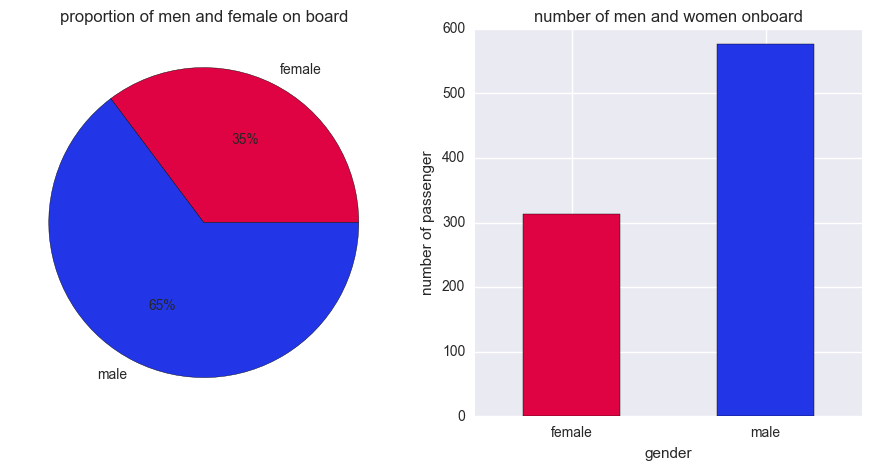

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(11,5))
gen_cla_propor_df.loc['total',genders].plot(kind='pie', colors= gen_color, ax=axs[0],\
                                   title='proportion of men and female on board', rot=0, autopct='%1.f%%')
axs[0].set_ylabel('')
gen_cla_df.loc['total', genders].plot(kind='bar', color=gen_color, ax=axs[1], rot=0,\
                                     title='number of men and women onboard')
axs[1].set_ylabel('number of passenger')
axs[1].set_xlabel('gender')

On the titanic men represented two third of the passengers.
Now we can look at the number of passenger per class.

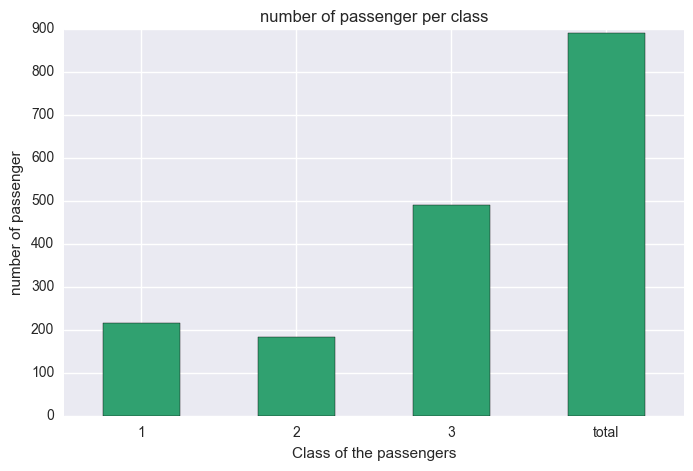

In [32]:
gen_cla_df['Total'].plot(kind='bar', rot=0, title='number of passenger per class',\
                        color= '#30a170', figsize=(8,5))
plt.ylabel('number of passenger')
plt.xlabel('Class of the passengers')

Interestingly the number of passenger in the second Class is lower than the number of passenger in the first Class. The third class shows the more passengers. Now we can compare the proportion of men and women in each Class with the general proportion (approximately 35% women and 65% men) found before.

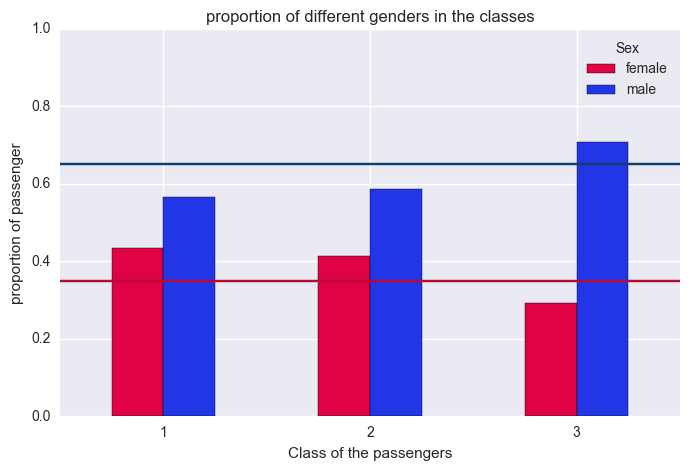

In [33]:
gen_cla_propor_df.loc[range(0,3), genders].plot(kind='bar', color= gen_color, figsize=(8,5),\
                       title='proportion of different genders in the classes', ylim=(0,1), rot=0)
plt.hlines([0.65,0.35], -0.5, 2.5, colors=['#0f406b', '#b80934'])
plt.ylabel('proportion of passenger')
plt.xlabel('Class of the passengers')

This bar graph shows the proportion of men and women in each class and the horizontal blue and red lines represent respectively the general proportion of men and women. We see that the proportion of men and women in the different classes shows a difference with the total proportion on the titanic (65% men and 35% women).
In the first two classes men and women proportion are quite close. In the first class there is 57% men and 43% women, the second class shows a  slightly higher men proportion than the first class (59% men and 41% women). The third class shows the lowest proportion of women with 29% women and 71% of men.

### Analysing the survival rates

We now know that there was more men than women onboard the titanic, and that this difference is bigger in the third class. Now I will investigate the survival rate of men and women.

We follow the same procedure as befrore, we first create summary dataframe and the we graph the information from those dataframes.

In [34]:
srvied_df = su_co_2D_df(titanic_df, 'sum')
srvied_propor_df = srvied_df/gen_cla_df
print srvied_df
print
print srvied_propor_df

Sex     female  male  Total
Pclass                     
1           91    45    136
2           70    17     87
3           72    47    119
total      233   109    342

Sex       female      male     Total
Pclass                              
1       0.968085  0.368852  0.629630
2       0.921053  0.157407  0.472826
3       0.500000  0.135447  0.242363
total   0.742038  0.188908  0.383838


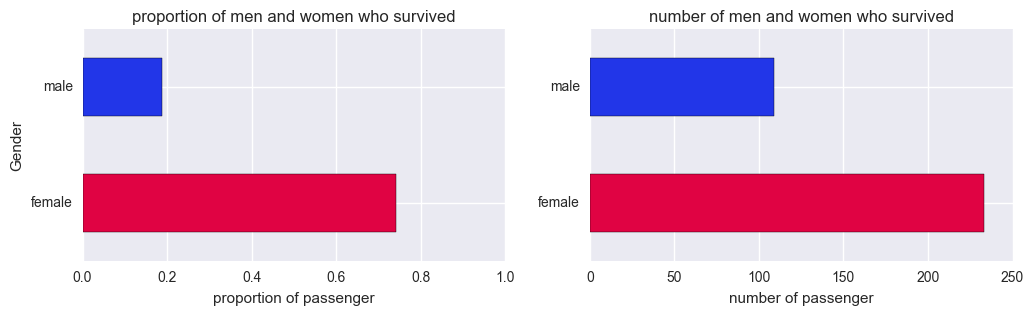

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12,3))

#first plot plot on the left
srvied_propor_df.loc['total', genders].plot(kind='barh', color= gen_color, rot=0, ax=axs[0],\
                                           title='proportion of men and women who survived', xlim=(0,1))
axs[0].set_xlabel('proportion of passenger')
axs[0].set_ylabel('Gender')

#plot on the right:
srvied_df.loc['total', genders].plot(kind='barh', color= gen_color, rot=0, ax=axs[1],\
                                           title='number of men and women who survived')
axs[1].set_xlabel('number of passenger')
axs[1].set_ylabel('')

We see that 74% of women survived compared to only 19% of men. We saw before that the total number of women onboard the Titanic was smaller than the number of men (314 vs 577), but the total number of women that survived is higher than the number of men, respectively 233 and 109. If the chances of men and women to be saved were equal, we would expect the same proportions (relative to each gender) of men and women to be saved. Because the proportion of women that survived is strikingly higher than the men survival rate, it suggest that there was a priority in saving women and that it seems to have worked.

I will now investigate if there was a priority for passenger from higher class.

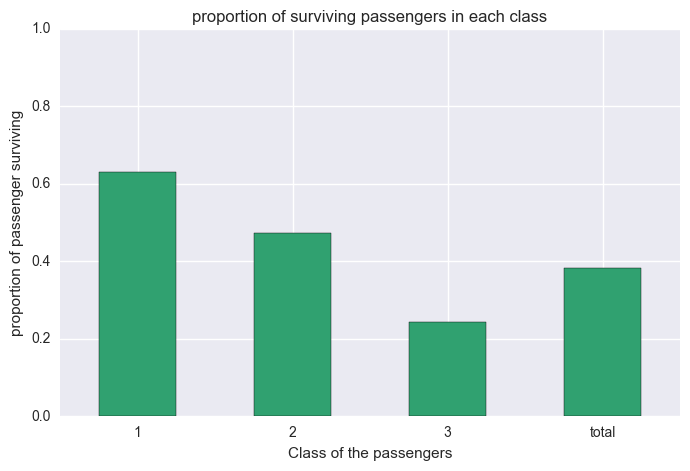

In [36]:
srvied_propor_df['Total'].plot(kind='bar', title='proportion of surviving passengers in each class',\
                                                      color='#30a170', figsize=(8,5), ylim=(0,1), rot=0)
plt.ylabel('proportion of passenger surviving')
plt.xlabel('Class of the passengers')

The chance to be saved decreased from the first class to the third one. Because people in first class payed higher fees than people in second class and passenger in both category payed higher fees than passenger of the third class, the class could be seen as an approximation for the social category of the passengers (see data description at the beginning of the document). With this approximation of social category, it suggest that passenger with a higher social status were saved in priority on the titanic.

An interresting question is to look at the effect of social status on the survival rates for each gender. Were men and women affected in the same way by their social status?

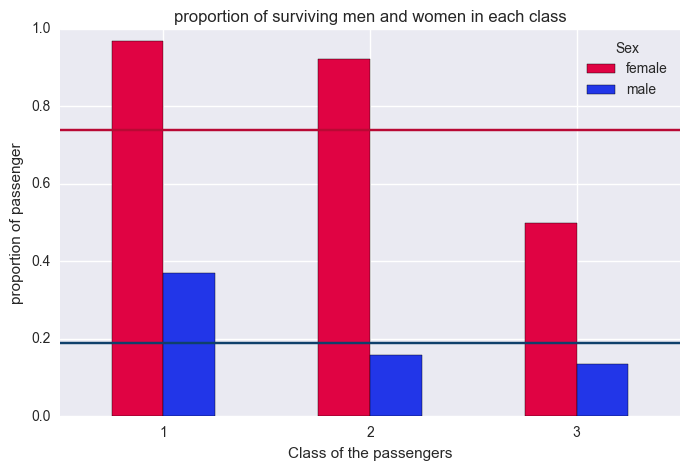

In [37]:
srvied_propor_df.loc[range(0,3), genders].plot(kind='bar', figsize=(8,5), color= gen_color, rot=0,\
                                              title='proportion of surviving men and women in each class')
plt.hlines([0.19,0.74], -0.5, 2.5, colors=['#0f406b', '#b80934'])
plt.ylabel('proportion of passenger')
plt.xlabel('Class of the passengers')

On this graph we see men (blue bar) and women (red bar) survival rate in each class. The horizontal blue and red lines represent respectively the global survival rates of men and women.
We see that in every category women had higher survival rates than men. We see the effect of class on men and women. Women in first and second class had probably a higher priority to be saved, 97% and 92% of women survived and only 50% of women in the third class survived. For men the effect of class was really noticable for the first class but they where probably less prioritized compare to women from the third category(37% survived). Men in second and third class had a small and close survival rate (16% and 14%).

### Conclusion

We have seen that there was more men than women on the titanic. In each class there was more men than women but the higher the class, the smaller the differences. Passenger in higher class had a higher survival rate. Women had a higher survival rate, generally and in each class compared to men. Women in the first two classes had a higher survival rate than in the third class. For men, the first class passengers had a higher survival rate than those in second and third class.

Comparing the survival rates of men and women don't give direct information on the priority of men and women during the saving operations on the Titanic. We can suppose that the high survival rate of women and the low survival rate of men was related to the priority of passenger during the saving operations but it is not a proof. The data analysed in this data set correspond to a sample of 891 passengers of the 1378 passengers aboard (see [titanic](https://en.wikipedia.org/wiki/RMS_Titanic#Aftermath_of_sinking)), this sample is supposed to be representative of the passsengers aboard.

With the limitations stated before in mind, the results suggest that the well know expression "children and women first" in case of a ship sinking is not only a Hollywood stereotype but was probably a real procedure on the Titanic. Women had higher survival rates than men, that suggest a prioritization of saving women over men during the saving operation. Even women with lower social status had a higher survival rate than men from the highest social status. Also we have seen that people from higher social ground were more likely to survive.

In this study we have only looked at the survival rates of women, but we haven't looked if the children had also a higher survival rates than adults. To do so we would have to deal with the missing values in the ages column, then we would have to define an age limit to describe what is a child and create a new data column for each passenger to know if it was an adult or a child. After that we would have to conduct the survival rate analysis on this information.



## Bibliography:

- [kaagle website](https://www.kaggle.com/c/titanic/data)
- [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html)
- matplotlib documentation (from the python shell)
- [titanic on wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic#Aftermath_of_sinking)